## CMPT 733 Project

## Insights for New Airbnb Hosts: A Data-Driven Analysis of Toronto's Airbnb Dataset



### Q1 - Part2 Contents:

#### 1. Are there any Airbnb renters who are always writing bad reviews? (done)
 - Use detailed review data to do sentiment analysis

#### 2. Optional: Comparison of the ratio of favorable/unfavorable reviews in different regions
 - Can also add time series comparisons if it makes sense

#### 3. Optional: The growth rate of airbnb host in the last 4 quarters?

#### 4. The language usage distribution of airbnb users? (done)

### 1. Are there any Airbnb renters who are always writing bad reviews?

In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("reviews.csv")

In [3]:
data

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1419,38924112,2015-07-19,11308465,Marcela,Having the opportunity of arriving to Alexandr...
1,1419,44791978,2015-08-29,9580285,Marco,We have no enough words to describe how beauty...
2,1419,45957133,2015-09-07,38394721,Andrea,The listing was exceptional and an even better...
3,1419,67295154,2016-03-28,3515044,Shaun,Alexandra's home was amazing and in such a nea...
4,1419,177702208,2017-08-03,13987100,Kate,Beautiful home. Very comfortable and clean. Pe...
...,...,...,...,...,...,...
437480,771238681088338261,773203762350484464,2022-12-02,27229658,Terence,"Host was friendly and helpful, and the home wa..."
437481,771238681088338261,773907378565075525,2022-12-03,484701591,Patricia,Salah was super kind and the Airbnb was super ...
437482,771972180097258127,774696372128153092,2022-12-04,19571570,Diana,Great and comfortable place to stay. Very prof...
437483,773766003078139118,776062367597891985,2022-12-06,142989071,Edilberto,Nice and clean place


In [4]:
len(data.id.unique())

437485

column 'id' uniquely identifies each review record

In [5]:
data.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         46
dtype: int64

In [6]:
data = data.dropna()

46 row consist of empty review is dropped

using 3 examples to adjust process function

In [7]:
data.comments[11]

"I had a wonderful time at Julie's home, felt welcome from the first day and she and her husband are very lovely and warm hosts! Julie was easy contactable, even if not in person, always get a quick responds texting her. Felt always safe in the neighborhood and the access to downtown by streetcar was direct and 24/7! The best is the beach close by..beautiful..for running, walking or just enjoying the sun. My room was always warm, very cozy with a huge closet :) and I had my privacy during the whole stay. A quiet and peaceful home to relax after a long day.\r<br/>Would chose Julies home again, when I have to stay for a longer period of time, summer there must be amazing!\r<br/>Thanks Julie :)"

In [8]:
data.comments[19]

'\r<br/>The view of the CN tower is just as the website shows. Kathie +  Larry are welcoming + love to talk about life +  art etc You must check out the felt Gnomes Kathie makes. Board walk along lakeside is worth trying Close to everything Apartment faciliies all first class very comfortable'

In [9]:
data.comments[43250]

'This rental is about as perfect as you can get! The decor, comfort, location, and hospitality are all fantastic. Being right on the park- and within a beautiful courtyard on the owners’ property- is so unique and enhances the stay so much!<br/>The hosts are so friendly and helpful—-kind and warm during the entire stay. This location is right in the Trinity Bellwoods Park, with a recreation center [that guests can use] fifty feet away and there are tennis courts, a playground, and so much more within the park’s grounds. In addition, this location is literally one block from Queen Street West, named one of the 15 coolest neighborhoods in the world! It lives up to its reputation, with shops, restaurants, bars, music venues, and more on every street for several blocks (which then leads to even more great things for several more blocks!). Toronto is a huge city, but this location exposes you to a great neighborhood area, with smaller side streets, really cool classic Victorian-type homes a

In [10]:
def process(text):
    # remove html tags
    cleaned_text = re.sub('<.*?>', '', text)
    
    # Remove special characters except for letters, numbers, and single spaces
    cleaned_text = re.sub('[^a-zA-Z0-9 \'-.,!()]', '', cleaned_text) 
    
    # Replace double spaces with a single space
    cleaned_text = re.sub('  +', ' ', cleaned_text)
    
    # Remove any leading or trailing spaces from the processed text
    cleaned_text = cleaned_text.strip()
    
    return cleaned_text

In [11]:
process(data.comments[11])

"I had a wonderful time at Julie's home, felt welcome from the first day and she and her husband are very lovely and warm hosts! Julie was easy contactable, even if not in person, always get a quick responds texting her. Felt always safe in the neighborhood and the access to downtown by streetcar was direct and 247! The best is the beach close by..beautiful..for running, walking or just enjoying the sun. My room was always warm, very cozy with a huge closet ) and I had my privacy during the whole stay. A quiet and peaceful home to relax after a long day.Would chose Julies home again, when I have to stay for a longer period of time, summer there must be amazing!Thanks Julie )"

In [12]:
process(data.comments[19])

'The view of the CN tower is just as the website shows. Kathie + Larry are welcoming + love to talk about life + art etc You must check out the felt Gnomes Kathie makes. Board walk along lakeside is worth trying Close to everything Apartment faciliies all first class very comfortable'

In [13]:
process(data.comments[43250])

'This rental is about as perfect as you can get! The decor, comfort, location, and hospitality are all fantastic. Being right on the park- and within a beautiful courtyard on the owners property- is so unique and enhances the stay so much!The hosts are so friendly and helpful-kind and warm during the entire stay. This location is right in the Trinity Bellwoods Park, with a recreation center that guests can use fifty feet away and there are tennis courts, a playground, and so much more within the parks grounds. In addition, this location is literally one block from Queen Street West, named one of the 15 coolest neighborhoods in the world! It lives up to its reputation, with shops, restaurants, bars, music venues, and more on every street for several blocks (which then leads to even more great things for several more blocks!). Toronto is a huge city, but this location exposes you to a great neighborhood area, with smaller side streets, really cool classic Victorian-type homes and row hou

apply process function in comments column

In [14]:
data['cleaned_comments'] = data['comments'].apply(lambda text: process(text))

C:\Users\kewei\AppData\Local\Temp\ipykernel_26672\2705096159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_comments'] = data['comments'].apply(lambda text: process(text))


In [15]:
data

,listing_id,id,date,reviewer_id,reviewer_name,comments,cleaned_comments
0,1419,38924112,2015-07-19,11308465,Marcela,Having the opportunity of arriving to Alexandr...,Having the opportunity of arriving to Alexandr...
1,1419,44791978,2015-08-29,9580285,Marco,We have no enough words to describe how beauty...,We have no enough words to describe how beauty...
2,1419,45957133,2015-09-07,38394721,Andrea,The listing was exceptional and an even better...,The listing was exceptional and an even better...
3,1419,67295154,2016-03-28,3515044,Shaun,Alexandra's home was amazing and in such a nea...,Alexandra's home was amazing and in such a nea...
4,1419,177702208,2017-08-03,13987100,Kate,Beautiful home. Very comfortable and clean. Pe...,Beautiful home. Very comfortable and clean. Pe...
...,...,...,...,...,...,...,...
437480,771238681088338261,773203762350484464,2022-12-02,27229658,Terence,"Host was friendly and helpful, and the home wa...","Host was friendly and helpful, and the home wa..."
437481,771238681088338261,773907378565075525,2022-12-03,484701591,Patricia,Salah was super kind and the Airbnb was super ...,Salah was super kind and the Airbnb was super ...
437482,771972180097258127,774696372128153092,2022-12-04,19571570,Diana,Great and comfortable place to stay. Very prof...,Great and comfortable place to stay. Very prof...
437483,773766003078139118,776062367597891985,2022-12-06,142989071,Edilberto,Nice and clean place,Nice and clean place


initiate sentiment analysis

In [16]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kewei\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


try on one example

In [17]:
text = data['cleaned_comments'][199] 
print(text)
analyzer.polarity_scores(text)

My partner and I spent three days staying at Kathy and Larry's home on the waterfront in Toronto.The room was quiet and nicely furnished. Larry and Kathy were very helpful and cooked us a very nice breakfast (great homemade bread!).You do share the bathroom with Larry and Kathy, but this was never a problem.Great views from your window of the CN Tower.


{'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.7127}

In [18]:
data['score_cleaned'] = data['cleaned_comments'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
data['score'] = data['comments'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
data

C:\Users\kewei\AppData\Local\Temp\ipykernel_26672\2670595460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['score_cleaned'] = data['cleaned_comments'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
C:\Users\kewei\AppData\Local\Temp\ipykernel_26672\2670595460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['score'] = data['comments'].apply(lambda x:analyzer.polarity_scores(x)['compound'])


,listing_id,id,date,reviewer_id,reviewer_name,comments,cleaned_comments,score_cleaned,score
0,1419,38924112,2015-07-19,11308465,Marcela,Having the opportunity of arriving to Alexandr...,Having the opportunity of arriving to Alexandr...,0.9940,0.9940
1,1419,44791978,2015-08-29,9580285,Marco,We have no enough words to describe how beauty...,We have no enough words to describe how beauty...,0.6580,0.6580
2,1419,45957133,2015-09-07,38394721,Andrea,The listing was exceptional and an even better...,The listing was exceptional and an even better...,0.9895,0.9895
3,1419,67295154,2016-03-28,3515044,Shaun,Alexandra's home was amazing and in such a nea...,Alexandra's home was amazing and in such a nea...,0.9529,0.9673
4,1419,177702208,2017-08-03,13987100,Kate,Beautiful home. Very comfortable and clean. Pe...,Beautiful home. Very comfortable and clean. Pe...,0.9793,0.9787
...,...,...,...,...,...,...,...,...,...
437480,771238681088338261,773203762350484464,2022-12-02,27229658,Terence,"Host was friendly and helpful, and the home wa...","Host was friendly and helpful, and the home wa...",0.9324,0.9324
437481,771238681088338261,773907378565075525,2022-12-03,484701591,Patricia,Salah was super kind and the Airbnb was super ...,Salah was super kind and the Airbnb was super ...,0.9612,0.9612
437482,771972180097258127,774696372128153092,2022-12-04,19571570,Diana,Great and comfortable place to stay. Very prof...,Great and comfortable place to stay. Very prof...,0.9664,0.9664
437483,773766003078139118,776062367597891985,2022-12-06,142989071,Edilberto,Nice and clean place,Nice and clean place,0.6705,0.6705


In [19]:
data.to_csv('review_sentiment.csv', index=False)

In [20]:
data2 = data[['id','reviewer_id', 'reviewer_name', 'score_cleaned', 'score']]
data2.to_csv('review_sentiment_score_only.csv', index=False)

<AxesSubplot:xlabel='score'>

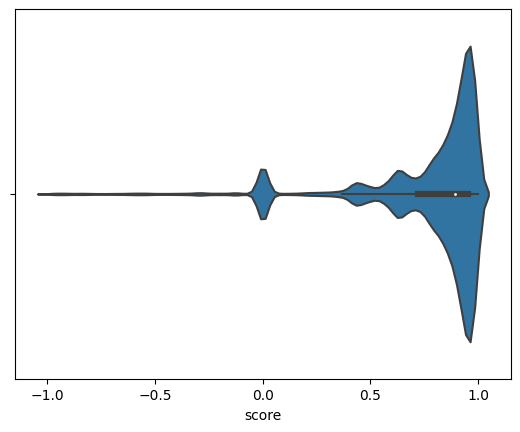

In [21]:
import seaborn as sns
sns.violinplot(x=data2["score"])

In [22]:
data2["score"].describe()

count    437439.000000
mean          0.764444
std           0.318348
min          -0.998600
25%           0.718400
50%           0.893400
75%           0.953400
max           0.999600
Name: score, dtype: float64

In [23]:
data2.groupby('reviewer_id').filter(lambda x: len(x) > 5)

,id,reviewer_id,reviewer_name,score_cleaned,score
161,241071419,26821041,Peter,0.9711,0.9595
233,706567099,36387682,Margaret,0.9784,0.9784
327,127932295,50947601,Sharon,0.0000,0.0000
350,56336031,43399403,Ignacio,0.9579,0.9579
511,19352138,4329818,Meagan,0.9274,0.9274
...,...,...,...,...,...
437264,775383532124459581,3334492,Frances & Gregory,0.9907,0.9907
437273,759455800903430077,295896798,Arie,0.9381,0.9381
437347,765998417484008748,33776775,Daniella,0.9744,0.9744
437454,771023114541177198,256962847,Érika C,0.9880,0.9880


inspect for zero score reviews

In [24]:
data[data['id']== 127932295]['comments'].values[0]

'The host canceled this reservation 17 days before arrival. This is an automated posting.'

it appears that zero value scores are meaningless auto generated reviews, so we remove them.

In [25]:
data2 = data2.query('score != 0')
data2

,id,reviewer_id,reviewer_name,score_cleaned,score
0,38924112,11308465,Marcela,0.9940,0.9940
1,44791978,9580285,Marco,0.6580,0.6580
2,45957133,38394721,Andrea,0.9895,0.9895
3,67295154,3515044,Shaun,0.9529,0.9673
4,177702208,13987100,Kate,0.9793,0.9787
...,...,...,...,...,...
437480,773203762350484464,27229658,Terence,0.9324,0.9324
437481,773907378565075525,484701591,Patricia,0.9612,0.9612
437482,774696372128153092,19571570,Diana,0.9664,0.9664
437483,776062367597891985,142989071,Edilberto,0.6705,0.6705


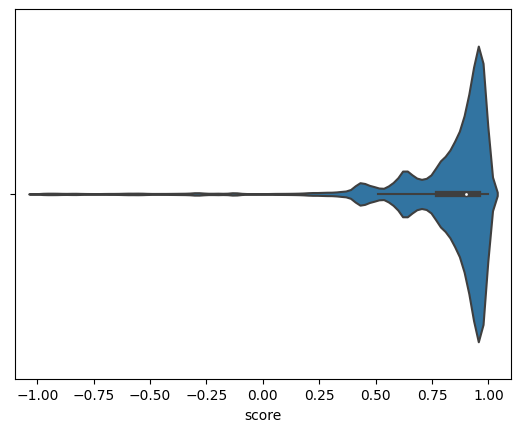

In [26]:
ax = sns.violinplot(x=data2["score"])
ax.set_xlim(-1.1, 1.1)
plt.show()

In [27]:
score = data2["score"]
score.describe()

count    412837.000000
mean          0.810000
std           0.265491
min          -0.998600
25%           0.778300
50%           0.902200
75%           0.955800
max           0.999600
Name: score, dtype: float64

In [28]:
len(score[score < 0]) / len(score)

0.02481366737961956

it appears that most reviews are positive comments, while there is still a long tail on the negative review side. 

2.48% of the reviews are negative.

We will now look for the reviewer that are more strict than the others: 


we first look at the distribution of comments grouped by reviewer id

In [29]:
comment_freq = data2.groupby('reviewer_id').size()
comment_freq.describe()

count    353291.000000
mean          1.168547
std           0.663052
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          58.000000
dtype: float64

<AxesSubplot:>

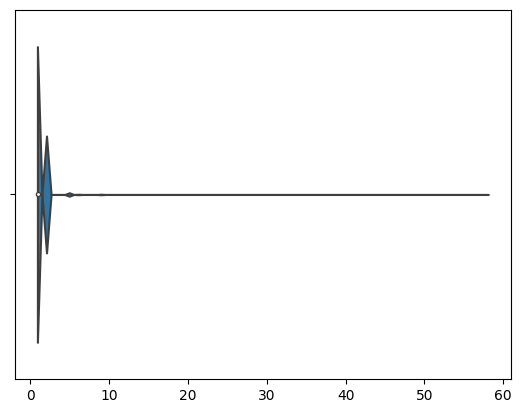

In [30]:
sns.violinplot(x=comment_freq)

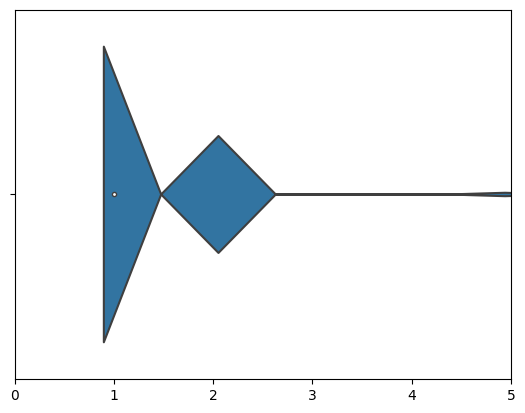

In [31]:
ax = sns.violinplot(x=comment_freq)
ax.set_xlim(0,5)
plt.show()

It appears that with more than 2 comments, one reviewer could be considered as higher than its peers.

after we examined the datset, we can consider the reviewers that satisfied both conditions: 

- have more than 2 comments
    
- have more than 2 comments that are lower than zero
    
as harsh reviewers

In [33]:
data2

,id,reviewer_id,reviewer_name,score_cleaned,score
0,38924112,11308465,Marcela,0.9940,0.9940
1,44791978,9580285,Marco,0.6580,0.6580
2,45957133,38394721,Andrea,0.9895,0.9895
3,67295154,3515044,Shaun,0.9529,0.9673
4,177702208,13987100,Kate,0.9793,0.9787
...,...,...,...,...,...
437480,773203762350484464,27229658,Terence,0.9324,0.9324
437481,773907378565075525,484701591,Patricia,0.9612,0.9612
437482,774696372128153092,19571570,Diana,0.9664,0.9664
437483,776062367597891985,142989071,Edilberto,0.6705,0.6705


In [36]:
harsh_reviewer = data2[data2['score'] < 0].groupby('reviewer_id').filter(lambda x: len(x) > 2)['reviewer_id'].unique()
harsh_reviewer

array([ 34209549, 142715693, 228005616, 378023416, 324420603, 150606880,
       151036962, 175538311, 202180532, 313106000,  79601806, 181883007],
      dtype=int64)

In [43]:
data[data['reviewer_id']== 34209549]

,listing_id,id,date,reviewer_id,reviewer_name,comments,cleaned_comments,score_cleaned,score
732,756619,420117465,2019-03-05,34209549,Christian,Tout était parfait.,Tout tait parfait.,-0.128,-0.128
114815,14585973,252411997,2018-04-10,34209549,Christian,Emplacement parfait et logement impeccable. On...,Emplacement parfait et logement impeccable. On...,0.000,0.000
154197,18024250,255464338,2018-04-20,34209549,Christian,"Rien à redire, tout était parfait.","Rien redire, tout tait parfait.",-0.128,-0.128
160027,18412333,196269931,2017-09-22,34209549,Christian,Hôte efficace et respectueux. Je le recommande...,Hte efficace et respectueux. Je le recommande ...,0.000,0.000
223618,23038764,523843562,2019-09-04,34209549,Christian,"Comme toujours, tout était en ordre et accommo...","Comme toujours, tout tait en ordre et accommod...",-0.128,-0.128
224366,23041239,260681953,2018-05-04,34209549,Christian,Fonctionnel et parfaitement situé.,Fonctionnel et parfaitement situ.,0.000,0.000


We noticed that although some non-english comments are compliments yet been classified as a negative comment, it appears that NLTK can only perform sentiment analysis on English text, we now use langdetect to determine if a comment is in english and exclude those non-english users for now.

In [45]:
from langdetect import detect

In [ ]:
lang = detect(text)

In [50]:
harsh_reviewer_list

[142715693,
 228005616,
 378023416,
 324420603,
 150606880,
 151036962,
 175538311,
 313106000,
 181883007]

In [59]:
harsh_reviewer_list = harsh_reviewer.tolist()
harsh_reviewer_list_en = []
for i in harsh_reviewer_list:
    lang0 = detect(str(data[data['reviewer_id']== i].iloc[0]['cleaned_comments']))
    lang1 = detect(str(data[data['reviewer_id']== i].iloc[1]['cleaned_comments']))
    print(lang0, lang1)
    if lang0 == 'en' and lang1 == 'en':
        harsh_reviewer_list_en.append(i)
print(harsh_reviewer_list_en)

fr fr
es es
en en
af en
en en
en en
en en
ro es
fr fr
es es
it it
ca es
[228005616, 324420603, 150606880, 151036962]


In [60]:
for i in harsh_reviewer_list_en:
    print(data[data['reviewer_id']== i][['reviewer_id','date','comments','score']])
    print('=========================================')

        reviewer_id        date  \
65436     228005616  2022-01-07   
65439     228005616  2022-01-21   
65573     228005616  2022-06-28   
65576     228005616  2022-07-07   
65580     228005616  2022-07-22   
65631     228005616  2022-07-29   
65633     228005616  2022-08-05   
67434     228005616  2022-06-24   
212430    228005616  2022-04-01   
289213    228005616  2021-12-09   
364862    228005616  2022-06-17   
364871    228005616  2022-07-14   

                                                 comments   score  
65436   My best Airbandb experience ever. Very easy ch...  0.9617  
65439   I have been to many air b and bs but Evelyns i...  0.9577  
65573   I have stayed at many Airbnbs for work and the...  0.9413  
65576   Evelyn’s is my home away from home. She is a c...  0.6844  
65580   Another amazing stay at Evelyn’s. 5 star ⭐️ al...  0.5859  
65631   I stay at Evelyn’s because I work to far from ...  0.6124  
65633               The absolute best Airbnb in the area.  0.6369  


It appears that there are indeed relatively strict reviewers, but in contract to our prior guess, they are all objective reviewer whom also have left some really good comments.

We summarize our conclusions on this problem as follow:
    
1. there are very few strict reviewers (even if our criteria is not strict: have leave at least two reviews while two or more of them are negative reviews)
    
2. even if there are a few strict reviewers, these all seem relatively objective, we didn't find trolling reviewers that always leaving negative feedbacks to all their visited listings.
    
3. at first we were hoping to find out some really bad reviewers on Airbnb that will almost 'for sure' giving out negative reviews on almost every their visits, then it will be meaningful if we can have a list of these reviewers so that new Airbnb hosts can try to avoid these people. But we surprisingly failed to find such kind of person, our guesses on the reason behinds this are these three:
        
        1) These kind of user might get reported by hosts, hence Airbnb could suspend their account, hence there is no data in the dataset
        
        2) We have only looked at one city in Canada, the sample size is too small, there might be more of these people if we look at more cities
        
        3) The airbnb user population is indeed very polite and decent

For future research, we will try to: 

1. automate the above code blocks so that we can perform similiar analysis on other cities.

2. if we indeed find any really bad reviewers, we will provide a tool for new Airbnb hosts to look up the reviewer_id. To protect reviewer privacy, we will not publish the reviewer name and id, but we will provide an access point where hosts can input a reviewer_id, and we will return a boolean value to tell the host if the reviewer is indeed a trolling reviewer.

### 2. Optional: Comparison of the ratio of favorable/unfavorable reviews in different regions

### Optional: 3. The growth rate of airbnb host in the last 4 quarters?

### 4. The language usage distribution of airbnb users?

We thought that English should be so overwhelmingly dominant that it would not be easy to spot significant reviewers of other languages. Yet we still found significnat portion of comments using non-English languages. Hence we explore a bit on what is the language usage distribution like base on Toronto.

In [84]:
data_small = data[['reviewer_id','cleaned_comments']]
data_small

,reviewer_id,cleaned_comments
0,11308465,Having the opportunity of arriving to Alexandr...
1,9580285,We have no enough words to describe how beauty...
2,38394721,The listing was exceptional and an even better...
3,3515044,Alexandra's home was amazing and in such a nea...
4,13987100,Beautiful home. Very comfortable and clean. Pe...
...,...,...
437480,27229658,"Host was friendly and helpful, and the home wa..."
437481,484701591,Salah was super kind and the Airbnb was super ...
437482,19571570,Great and comfortable place to stay. Very prof...
437483,142989071,Nice and clean place


We check what language does the reviewer uses, since sometimes different languages might be similar in certain vocabulary, we compute the mode of the detected language in the review for each reviewer.

In [67]:
from langdetect import detect

def detect_language(text):
    try:
        lang = detect(text)
        return lang
    except:
        return None

We now look at the # of reviewers in the Toronto dataset:

In [147]:
data.groupby('reviewer_id').size()

reviewer_id
1396         1
1565         2
1744         1
1853         1
2078         1
            ..
489843144    1
489863916    1
489917960    1
489926082    1
490009658    1
Length: 374433, dtype: int64

It appears that there were 374433 unique reviewers

Due to the heavy computational cost, we did not performed this analysis on every row, instead we sampled 20000 rows from the dataset (roungly 5% of the population)

In [118]:
data_grouped = data.sample(n=20000, random_state=123).groupby('reviewer_id')

In [119]:
languages = data_grouped['cleaned_comments'].apply(lambda x: x.apply(detect_language).mode())
languages

reviewer_id   
2385         0    en
9758         0    en
10486        0    en
11298        0    fr
14267        0    en
                  ..
487704121    0    ro
487748616    0    en
488359545    0    sl
488789203    0    en
489015568    0    en
Name: cleaned_comments, Length: 19582, dtype: object

In [120]:
languages_df = languages.to_frame().reset_index()[['reviewer_id','cleaned_comments']]
languages_df.columns = ['reviewer_id', 'language']
languages_df

,reviewer_id,language
0,2385,en
1,9758,en
2,10486,en
3,11298,fr
4,14267,en
...,...,...
19577,487704121,ro
19578,487748616,en
19579,488359545,sl
19580,488789203,en


We obtain a count for each languages, and then we use iso-639 library to encode each language code to the full name of the language.

In [125]:
# assuming you have a Pandas DataFrame called 'df' with a 'language' column
# and you want to count the number of occurrences of each language
lang_counts = languages_df['language'].value_counts()
lang_counts

en    18136
fr      585
es      260
ro       96
de       89
pt       77
so       48
af       42
it       35
ca       29
cs       29
nl       25
tl       22
pl       17
sw       13
id       12
da       11
hu       11
cy        7
no        6
vi        6
hr        5
sl        5
sv        4
et        3
fi        3
tr        3
sq        1
lv        1
sk        1
Name: language, dtype: int64

In [126]:
import iso639
lang_names = [iso639.to_name(lang_code) for lang_code in lang_counts.index]

In [127]:
lang_counts.index = lang_names
lang_counts

English                          18136
French                             585
Spanish; Castilian                 260
Romanian; Moldavian; Moldovan       96
German                              89
Portuguese                          77
Somali                              48
Afrikaans                           42
Italian                             35
Catalan; Valencian                  29
Czech                               29
Dutch; Flemish                      25
Tagalog                             22
Polish                              17
Swahili                             13
Indonesian                          12
Danish                              11
Hungarian                           11
Welsh                                7
Norwegian                            6
Vietnamese                           6
Croatian                             5
Slovenian; Slovene                   5
Swedish                              4
Estonian                             3
Finnish                  

We use a threshold of 5 occurence to avoid too many categories in the visualization, if the occurence is below 5, it will be categorized as 'Other'

In [130]:
# set a threshold for the minimum number of occurrences
threshold = 10

# filter the language counts to include only languages with at least 'threshold' occurrences
filtered_lang_counts = lang_counts[lang_counts >= threshold]

# combine the remaining languages into an 'other' category
other_lang_count = lang_counts[lang_counts < threshold].sum()
filtered_lang_counts['Other'] = other_lang_count

filtered_lang_counts

English                          18136
French                             585
Spanish; Castilian                 260
Romanian; Moldavian; Moldovan       96
German                              89
Portuguese                          77
Somali                              48
Afrikaans                           42
Italian                             35
Catalan; Valencian                  29
Czech                               29
Dutch; Flemish                      25
Tagalog                             22
Polish                              17
Swahili                             13
Indonesian                          12
Danish                              11
Hungarian                           11
Other                               45
Name: language, dtype: int64

We now draw a pie-chart

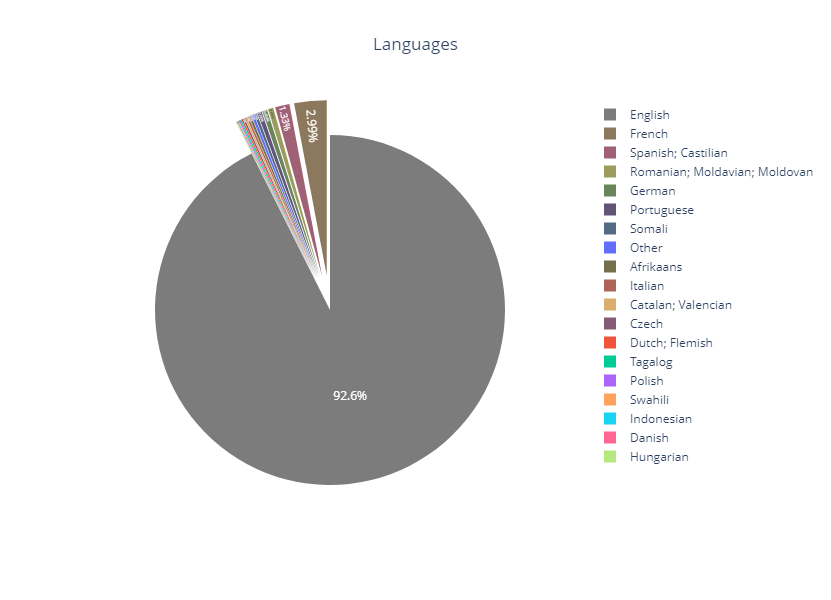

In [146]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# create a Plotly pie chart
fig = go.Figure(
    data=[go.Pie(labels=filtered_lang_counts.index, 
                 values=filtered_lang_counts.values,
                 pull=[0]+[0.2]*18,
                 marker=dict(colors=px.colors.qualitative.Antique_r)
                )],
    layout_title_text='Languages',
    layout_title_x=0.5
)
fig.update_traces(textposition='inside')

fig.update_layout(
    width=800,
    height=600
)

fig.show()

The data shows the language usage distribution for Airbnb listings in Toronto, with English being the dominant language at 92.62%. French is the second most commonly used language at 2.99%, followed by Spanish at 1.33%, and Romanian at 0.49%. Other languages, such as German, Portuguese, Somali, Afrikaans, Italian, Catalan, and Czech, each account for less than 1% of the total language usage. The remaining languages listed, including Dutch, Tagalog, Polish, Swahili, Indonesian, Danish, and Hungarian, each make up less than 0.2% of the language usage.

It is important to note that the dataset is limited to Airbnb listings in Toronto and may not be representative of language usage in the wider community. It is possible that the high use of French is related to the fact that Toronto is located in Ontario which is adjacent to Quebec. However, the data does provide insight into the linguistic diversity of Airbnb hosts and guests in Toronto.